#  EXPLORATORY ANALYSIS ON VIDEO GAMES AROUND THE WORLD

This dataset contains a list of video games with sales greater than 100,000 copies. 

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [19]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
video_games = pd.read_csv("vgsales.csv")
video_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# checking total rows and columns
video_games.shape

(16598, 11)

In [4]:
#checking for missing values
video_games.count()

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [5]:
#dropping missing values
video_games.dropna(inplace = True)

In [6]:
#confirming if missing values are dropped
video_games.count()

Rank            16291
Name            16291
Platform        16291
Year            16291
Genre           16291
Publisher       16291
NA_Sales        16291
EU_Sales        16291
JP_Sales        16291
Other_Sales     16291
Global_Sales    16291
dtype: int64

In [7]:
video_games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


From the above Dateframe, North America sales Standard Deviation is the highest, which highlight how the sales are far spread

out than the sales in Europe, Japan and the the rest of the world. In contrast, Sales in the rest of the world has the lowest

Standard Deviation, which shows the sales are closer to each other.

In [8]:
#checking for the Genre with the highest number accross all region
Total_Genre = pd.DataFrame(video_games.groupby("Genre", as_index = False)["Rank"].count()).sort_values(by = "Rank", ascending = False)
Total_Genre

,Genre,Rank
0,Action,3251
10,Sports,2304
3,Misc,1686
7,Role-Playing,1470
8,Shooter,1282
1,Adventure,1274
6,Racing,1225
4,Platform,875
9,Simulation,848
2,Fighting,836


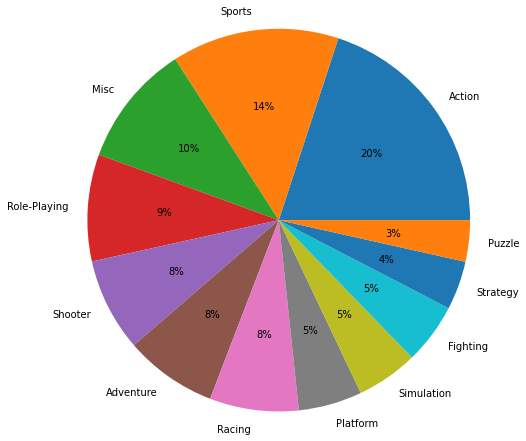

In [9]:
#Graphical visualization of the result above
plt.pie(Total_Genre.Rank, labels = Total_Genre.Genre, radius = 2.2, autopct = "%0.0f%%")
plt.show()

Action and Sports Genre has the highest video games all over the regions with 20% and 14% respectively. Strategy and Puzzle games seems not to interest people, with both being the least at 4% each.

In [25]:
sum_by_year = video_games.groupby("Year", as_index = False)[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
sum_by_year

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980.0,10.59,0.67,0.00,0.12
1,1981.0,33.40,1.96,0.00,0.32
2,1982.0,26.92,1.65,0.00,0.31
3,1983.0,7.76,0.80,8.10,0.14
4,1984.0,33.28,2.10,14.27,0.70
5,1985.0,33.73,4.74,14.56,0.92
6,1986.0,12.50,2.84,19.81,1.93
7,1987.0,8.46,1.41,11.63,0.20
8,1988.0,23.87,6.59,15.76,0.99
9,1989.0,45.15,8.44,18.36,1.50


The Dataframe highlight the total sales recorded by all region from 1980 to 2020. North America and other countries both had their highest total sales in 2008, while Europe and Japan had theirs in 2009 and 2006 respectively.

In [26]:
#checking the publisher with the highest video games 
pd.DataFrame(video_games.groupby("Publisher", as_index = False)["Rank"].count()).sort_values(by = "Rank", ascending = False).head(10).reset_index(drop = True)

,Publisher,Rank
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


Above Dataframe shows the top 10 game publishers, Electronic Arts dominates the number of published games

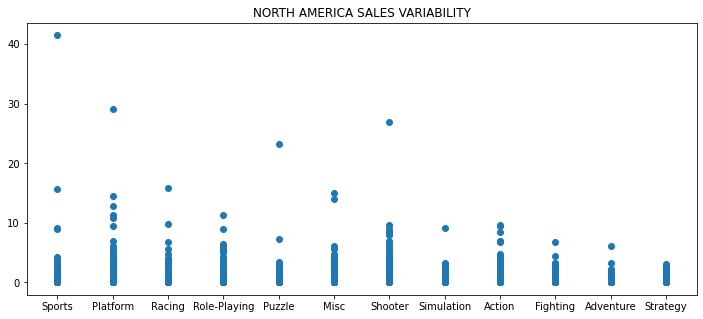

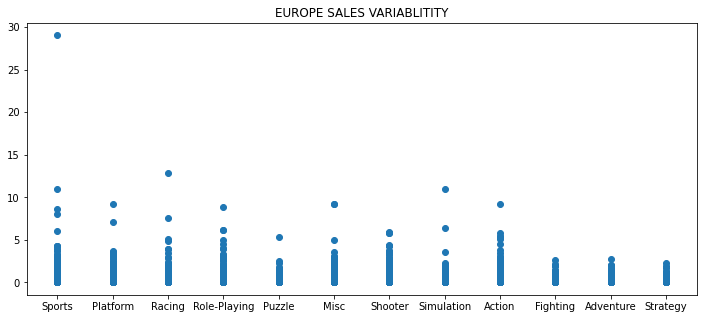

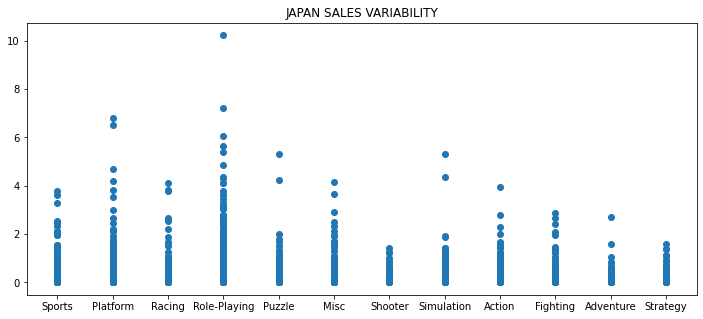

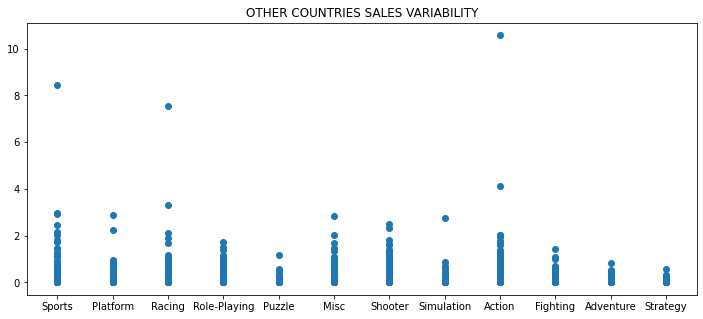

In [16]:
#checking the video game sales variability in all regions

plt.figure(figsize = (12,5))
plt.scatter(video_games.Genre, video_games.NA_Sales)
plt.title("NORTH AMERICA SALES VARIABILITY")
plt.show()

plt.figure(figsize = (12, 5))
plt.scatter(video_games.Genre, video_games.EU_Sales)
plt.title("EUROPE SALES VARIABLITITY")
plt.show()

plt.figure(figsize = (12, 5))
plt.scatter(video_games.Genre, video_games.JP_Sales)
plt.title("JAPAN SALES VARIABILITY")
plt.show()

plt.figure(figsize = (12, 5))
plt.scatter(video_games.Genre, video_games.Other_Sales)
plt.title("OTHER COUNTRIES SALES VARIABILITY")
plt.show()

The variablity visualization above makes it evident on how the sales in all regions varies from one another , which confirm 
again that the North America sales has the highest standard of deviation with other countries sales being least .

In [87]:
all_sales = video_games.groupby("Genre", as_index = False)[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
all_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,861.77,516.48,158.65,184.92,1722.84
1,Adventure,101.93,63.74,51.99,16.70,234.59
2,Fighting,220.74,100.00,87.15,36.19,444.05
3,Misc,396.92,211.77,106.67,73.92,789.87
4,Platform,445.99,200.65,130.65,51.51,829.13
5,Puzzle,122.01,50.52,56.68,12.47,242.21
6,Racing,356.93,236.31,56.61,76.68,726.76
7,Role-Playing,326.50,187.57,350.29,59.38,923.83
8,Shooter,575.16,310.45,38.18,101.90,1026.20
9,Simulation,181.78,113.02,63.54,31.36,389.98


Above Dataframe highlights the total sales of each Genre in North America, Europe, Japan,

Other countries and the total global sales of each Genre, with all numbers represented in millions.

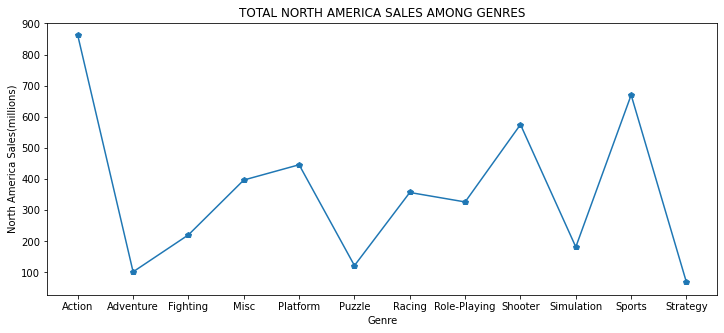

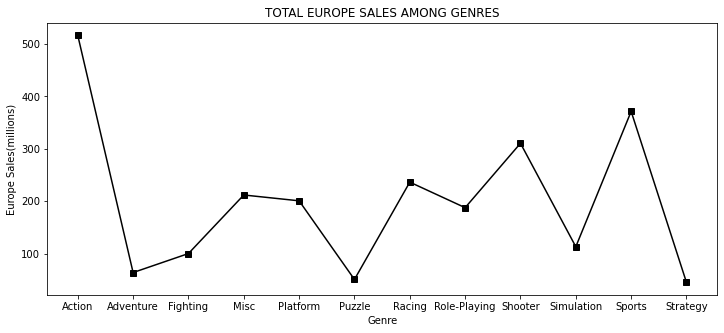

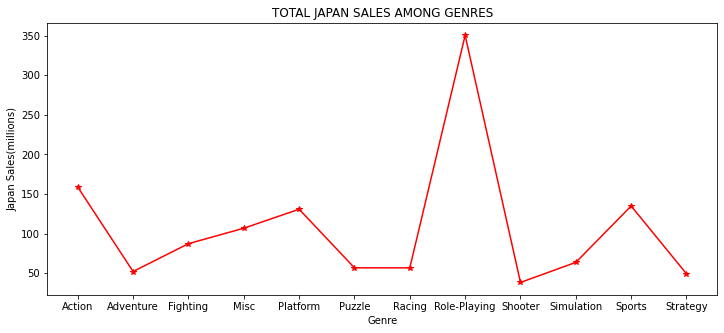

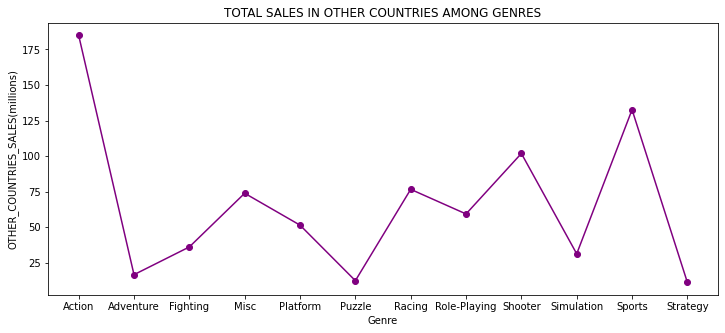

In [90]:
# Graphical representation of the total sales of each region
plt.figure(figsize = (12, 5))
plt.plot(all_sales.Genre, all_sales.NA_Sales,marker = "p")
plt.xlabel("Genre")
plt.ylabel("North America Sales(millions)")
plt.title("TOTAL NORTH AMERICA SALES AMONG GENRES")
plt.show()

plt.figure(figsize = (12, 5))
plt.plot(all_sales.Genre, all_sales.EU_Sales, color = "black", marker = "s")
plt.xlabel("Genre")
plt.ylabel("Europe Sales(millions)")
plt.title("TOTAL EUROPE SALES AMONG GENRES")
plt.show()

plt.figure(figsize = (12, 5))
plt.plot(all_sales.Genre, all_sales.JP_Sales, color = "red", marker = "*")
plt.xlabel("Genre")
plt.ylabel("Japan Sales(millions)")
plt.title("TOTAL JAPAN SALES AMONG GENRES")
plt.show()

plt.figure(figsize = (12, 5))
plt.plot(all_sales.Genre, all_sales.Other_Sales, color = "purple", marker = "o")
plt.xlabel("Genre")
plt.ylabel("OTHER_COUNTRIES_SALES(millions)")
plt.title("TOTAL SALES IN OTHER COUNTRIES AMONG GENRES")
plt.show()

The line graph above shows a steady popularity of Action games in most regions except for Japan where Role-Playing Genre is its most popular game.

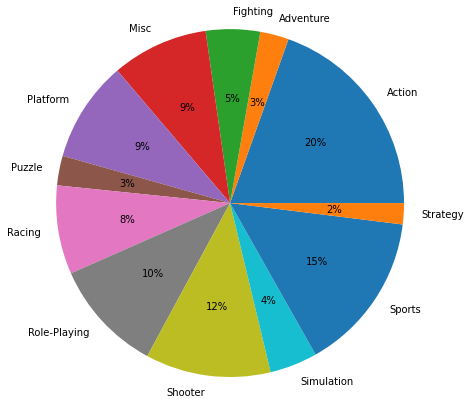

In [91]:
#the overall video game sales among Genre.
plt.pie(all_sales.Global_Sales, labels = all_sales.Genre, radius = 2, autopct = "%0.0f%%")
plt.show()

The pie chart above shows that Action, Sports and shooter video games are the top 3 Genre with the biggest global sales, taking 
a whooping 47% of the entire global sales. While Strategy, Puzzle and Adventure occupy the bottom three.

CONCLUSION :  Action games are the most popular Game genre around the world with a total global sales of a little over 1.7 billion. Sport Genre is the second both in popularity and sales recorded globally with a little over 1.3 billion. However, Strategy Genre is the least in popularity and with the lowest global sales of just 173 million.
After the exploration of this Dataset, its evident that Action, Sport and Shooter video game genres are the proposed genres for individual looking to invest in the video games industry in any part of the word except for Japan. 